# Fetching Key MF values

In [1]:
import matplotlib.pyplot as plt

### Generating toy data

In [2]:
from mfanalysis.generate_data import generate_fbm_path

In [3]:
X = generate_fbm_path(4096, 0.8)[:, 0]

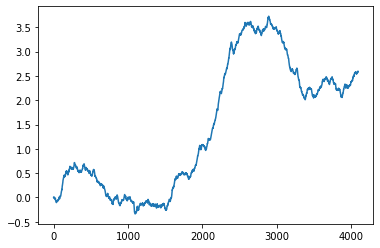

In [4]:
plt.plot(X)
plt.show()

#### Multifractal analysis

In [5]:
import mfanalysis.mf_analysis as mf

In [6]:
import numpy as np

In [7]:
sf, cumul, mfs = mf.mf_analysis_full(X,
    j1=2, j2=8,
    q=np.arange(-2,3),
    n_cumul=2,
    p_exp=2
)

#### Getting variables

$\zeta(q)$

In [8]:
zeta = sf.zeta

In [9]:
zeta

array([-1.58356079, -0.78791116,  0.        ,  0.78414908,  1.56700336])

In [10]:
q = 2

zeta[sf.q == q]

array([1.56700336])

$c_p$

In [11]:
c_p = cumul.log_cumulants

In [12]:
c_p

array([ 0.78545286, -0.00364008])

In [13]:
p = 1

c_p[cumul.m == p][0]

0.7854528639629028

$\log_2 S(j, q)$

In [14]:
logSjq = sf.logvalues

In [15]:
logSjq

array([[ 17.38220918,  15.07983924,  13.54003072,  11.8522281 ,
         10.39565083,   8.61507386,   7.19729393,   5.91390231,
          4.53249037],
       [  8.37686016,   7.46572188,   6.71248408,   5.85627377,
          5.12790873,   4.25833159,   3.54222776,   2.91814976,
          2.26611491],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [ -8.00585251,  -7.32737306,  -6.59373517,  -5.71985119,
         -4.96506848,  -4.16955467,  -3.43404841,  -2.85122328,
         -2.26585431],
       [-15.76412453, -14.52450892, -13.0675513 , -11.30759581,
         -9.74854288,  -8.26059021,  -6.77346953,  -5.64762097,
         -4.53144807]])

In [16]:
q = 2

logSjq[sf.q == q, :]

array([[-15.76412453, -14.52450892, -13.0675513 , -11.30759581,
         -9.74854288,  -8.26059021,  -6.77346953,  -5.64762097,
         -4.53144807]])

In [17]:
j = 5

logSjq[:, sf.j == j]

array([[10.39565083],
       [ 5.12790873],
       [ 0.        ],
       [-4.96506848],
       [-9.74854288]])

In [18]:
j = 5
q = 2

logSjq[sf.q == q, sf.j == j]

array([-9.74854288])

$C_p(j)$

In [19]:
c = cumul.values

In [20]:
c

array([[-5.65766979e+00, -5.12581503e+00, -4.61187631e+00,
        -4.01160336e+00, -3.50059790e+00, -2.91967932e+00,
        -2.41664950e+00, -1.99812342e+00, -1.57066084e+00],
       [ 2.49104520e-01,  9.57827471e-02,  8.24553722e-02,
         9.46164640e-02,  1.13088083e-01,  6.15602390e-02,
         7.55216911e-02,  4.64641849e-02,  1.80639165e-04]])

In [21]:
p = 1
j = 5

c[cumul.m == p, cumul.j == j]

array([-3.5005979])

$D(h)$

In [22]:
D = mfs.Dq
h = mfs.hq

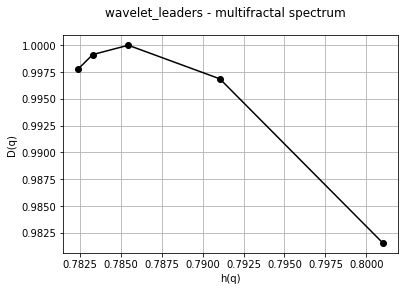

In [23]:
mfs.plot()

In [24]:
q = 2

h[mfs.q == q], D[mfs.q == q]

(array([0.78240291]), array([0.99780246]))

## Using wavelet coefs

You will need to separate the wavelet decomposition from the multi-fractal analysis

In [25]:
import mfanalysis.wavelet as wt

The `wt_trans` object contains both the wavelet coefficients and the wavelet leaders

In [27]:
wt_trans = wt.wavelet_analysis(X,
    j1=2, j2=8,
    p_exp=2
)

The `mf_analysis` function picks up from a wavelet decomposition to compute everything that is needed

The important thing to note here is that we specify `p_exp = None` in order to get the structure function, cumulants and multifractal spectrum to be computed using the wavelet coefs instead of wavelet leaders as would be the case if we kept `p_exp = 2`

In [35]:
sf_coef, cumul_coef, mfs_coef = mf.mf_analysis(*wt_trans, p_exp=None, j1=2, weighted=True, n_cumul=2, q=np.arange(-2, 3))

Since the `sf_coef`, `cumul_coef`, and `mfs_coef` variables have the same structure as the `sf`, `cumul`, and `mfs` variables presented before, the multifractal variables of interest ($c_p$, $D(h)$, ...) can be obtained in the exact same way